### O que é um histograma?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
km = pd.Series([4, 6, 6, 7, 11, 13, 18, 18, 21, 24, 26, 27, 35, 36, 36, 42, 43, 45, 49])

In [96]:
def pct(x):
    return "{0:.2f}%".format(x*100)

In [22]:
def calcula_ticks(lista, barras):
    
    # lista[-1] --> Ultimo Valor da lista
    # lista[0] --> Primeiro Valor da lista
    # intervalo = (ult_val - pri_val)/barras
    lista.sort()
    intervalo = (lista[-1] - lista[0])/barras
    
    primeiro = lista[0]
    ultimo = primeiro + intervalo
    ticks = [primeiro, ultimo]
    
    for x in range(barras-1):
        ultimo += intervalo
        ticks.append(ultimo)
    
    return ticks

In [36]:
# Calculo da frequencia relativa
def freq_relativa(total, yticks):
    f_rel = []
    
    for item in yticks:
        aux = item/total
        f_rel.append("{0:.2f}%".format(aux*100)) # convertendo para valor
                                                   # textual com duas casas 
                                                   # decimais
    return f_rel

In [59]:
def gera_histograma(data_series, barras, titulo, unidade):

    # plotar o histograma
    # barras --> quantidade de barras no histograma
    lista = data_series.values

    ticks = calcula_ticks(lista, barras) # ajustando o intervalo do eixo x
    ax = data_series.plot.hist(bins=barras, rwidth=0.98) # plotando o histograma

    # calcula a frequencia relativa
    y_ticks = ax.get_yticks()
    freq_rel = freq_relativa(len(lista), y_ticks)
    ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa 

    # configurar o tamanho da figura
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)
    
    # Ajustes no layout do histograma
    plt.title(titulo)
    plt.xticks(ticks) # sobrescrevendo os rótulos do eixo x
    plt.xlabel(unidade)
    plt.ylabel("Frequencia")
    plt.grid(axis="y") # Colocar uma grid (Grade)
    plt.show()
    


C:\Users\Leonardo\AppData\Local\Temp/ipykernel_2712/9946490.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa


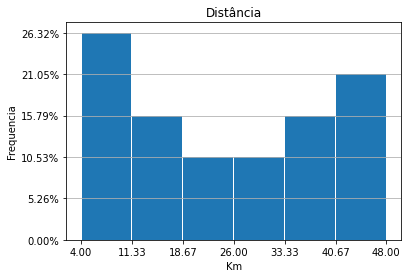

In [43]:
gera_histograma(km, 6, "Distância", "Km")

### Frequência relativa

Frequencia relativa quer dizer basicamente o percentual de representatividade
de cada uma das colunas.

In [26]:
# Para se obter a frequencia relativa basta pegar o valor associado a frequencia
# de cada coluna e dividir pelo total de valores.

# Por exemplo, a frequencia relativa referente à primeira coluna é:
freq_rel_1 = (5/len(lista))* 100
print(f'Frequencia Relativa 1: {freq_rel_1:.2f} %')

Frequencia Relativa 1: 26.32 %


In [38]:
freq_rel

['0.00%', '5.26%', '10.53%', '15.79%', '21.05%', '26.32%', '31.58%']

### Medidas de Dispersão

In [44]:
import pandas as pd

In [45]:
data = pd.read_csv("weight-height.csv")

In [46]:
# Altura provavelmente está em polegadas
# Para transformar polegadas em centimetros basta multiplicar por 2.54
data.head() #

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
data["Altura_cm"] = data["Height"]*2.54

In [98]:
data["Peso_kg"] = data["Weight"]*0.453592

In [99]:
data.head()

,Gender,Height,Weight,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.720985
1,Male,68.781904,162.310473,175.0,73.622732
2,Male,74.110105,212.740856,188.0,96.497550
3,Male,71.730978,220.042470,182.0,99.809504
4,Male,69.881796,206.349801,177.0,93.598619


In [51]:
# arredondar a altura, para podermos calcular a moda de maneira mais interessante
data["Altura_cm"] = data["Altura_cm"].round(0) # arredondar para 0 casas decimais

In [100]:
# arredondar peso para uma casa decimal
data["Peso_kg"] = data["Peso_kg"].round(1)

In [101]:
data.head()

,Gender,Height,Weight,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


## Avaliação das Alturas das Mulheres

In [68]:
## selecionar a altura das mulheres
DS_mulheres = data[data['Gender'] == "Female"]["Altura_cm"]

C:\Users\Leonardo\AppData\Local\Temp/ipykernel_2712/4050399821.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa


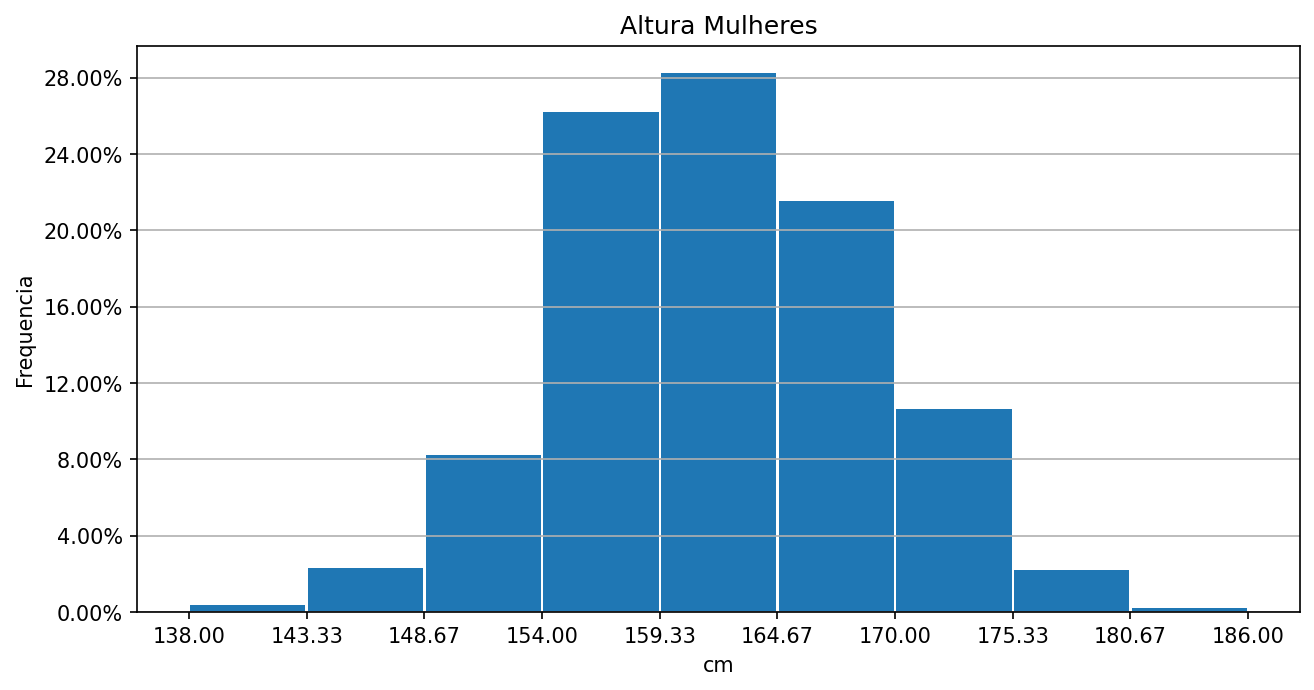

In [69]:
gera_histograma(DS_mulheres, 9, "Altura Mulheres", "cm")

In [61]:
# modulo python que faz algumas avaliações estatísticas
import statistics as stats

### Média

Dada uma sequencia de valores, a média se dá pela soma de todos esses valores dividido pela quantidade de valores dessa sequência. 

In [62]:
stats.mean(DS_mulheres) # média das alturas das mulheres 

161.8112

### Mediana

Dada uma sequência de valores ordenados, a mediana é o valor central dessa sequencia de elementos. Se houverem dois valores centrais, a mediana se dá pela média desses dois valores.

In [63]:
stats.median(DS_mulheres) # mediana

162.0

### Moda

Dada uma sequência de valores, a moda é o valor que mais se repete.

In [64]:
stats.mode(DS_mulheres) # moda

162.0

## Avaliação das alturas dos Homens

In [70]:
## selecionar a altura dos homens
DS_homens = data[data['Gender'] == "Male"]["Altura_cm"]

C:\Users\Leonardo\AppData\Local\Temp/ipykernel_2712/4050399821.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa


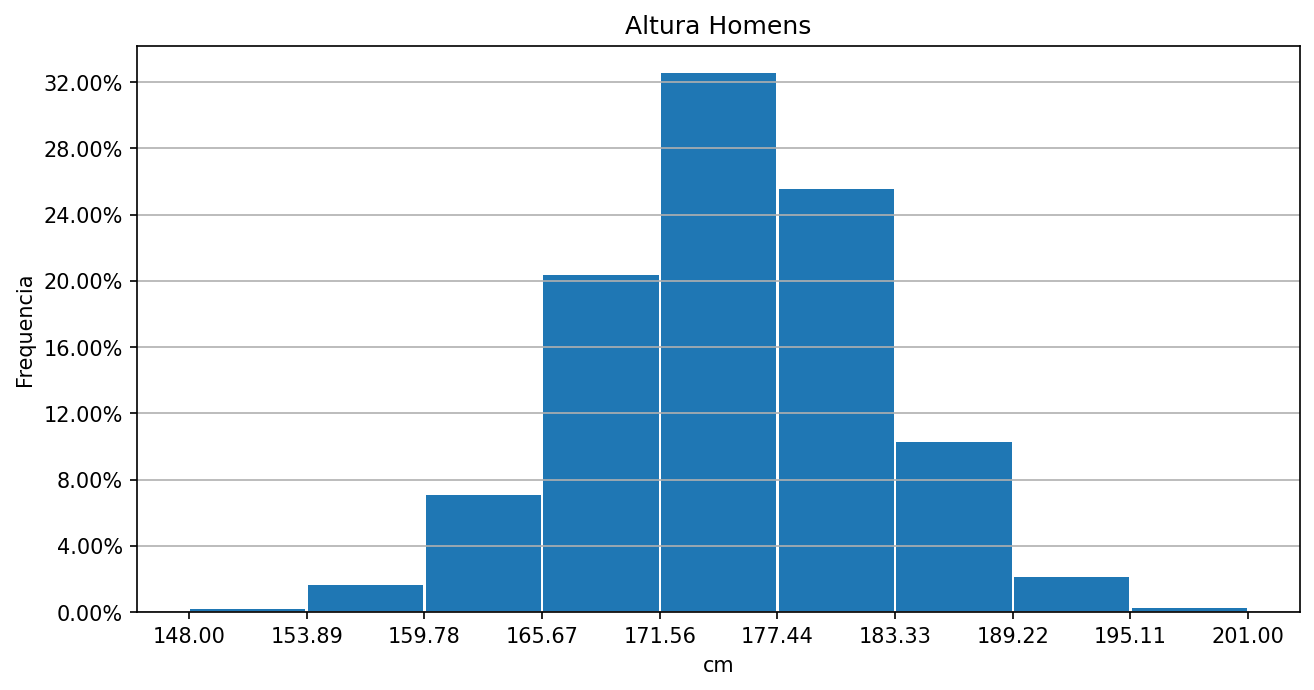

In [93]:
# histograma das alturas masculinas
gera_histograma(DS_homens, 9, "Altura Homens", "cm")

In [73]:
## Média, moda e mediana
print("Altura dos homens:")
print("Média: ", stats.mean(DS_homens))
print("Mediana: ", stats.median(DS_homens))
print("Média: ", stats.mode(DS_homens))

Altura dos homens:
Média:  175.327
Mediana:  175.0
Média:  175.0


### Variancia

A variancia é o desvio dos dados em relação à média.
<br>
<img src="imagens/variancia-populacao.png">
<img src="imagens/variancia-amostra.png">
</br>

### Desvio Padrão

O desvio padrão se dá pela raiz quadrada do valor que obtivemos com o calculo da variância

#### Calculo da Variancia

In [76]:
# import statistics as stats
def variancia_amostra(data_series):
    media = stats.mean(data_series)

    somatorio = 0
    for item in data_series:
        calc = (item - media)**2
        somatorio = somatorio + calc

    variancia = somatorio/(len(data_series)-1)
    return variancia

def desvio_padrao(variancia):
    return (variancia)**(1/2)

In [78]:
m_variancia = variancia_amostra(DS_mulheres) # variancia mulheres
m_desvPadrao = desvio_padrao(m_variancia) # desvio padrão mulheres

In [81]:
h_variancia = variancia_amostra(DS_homens) # variancia homens
h_desvPadrao = desvio_padrao(h_variancia) # desvio padrão homens

In [84]:
print("Mulheres:")
print(f">> Variancia: {m_variancia:.2f}")
print(f">> Desvio Padrão: {m_desvPadrao:.2f}")

print("\nHomens:")
print(f">> Variancia: {h_variancia:.2f}")
print(f">> Desvio Padrão: {h_desvPadrao:.2f}")

Mulheres:
>> Variancia: 46.93
>> Desvio Padrão: 6.85

Homens:
>> Variancia: 53.10
>> Desvio Padrão: 7.29


In [89]:
# agora usando o modulo statistics
#
# Mulheres
ms_variancia = stats.variance(DS_mulheres) # variancia mulheres
ms_desvPadrao = stats.stdev(DS_mulheres) # desvio padrão mulheres

# Homens 
hs_variancia = stats.variance(DS_homens) # variancia homens
hs_desvPadrao = stats.stdev(DS_homens) # desvio padrão homens

In [90]:
print("Mulheres:")
print(f">> Variancia: {ms_variancia:.2f}")
print(f">> Desvio Padrão: {ms_desvPadrao:.2f}")

print("\nHomens:")
print(f">> Variancia: {hs_variancia:.2f}")
print(f">> Desvio Padrão: {hs_desvPadrao:.2f}")

Mulheres:
>> Variancia: 46.93
>> Desvio Padrão: 6.85

Homens:
>> Variancia: 53.10
>> Desvio Padrão: 7.29


## Coeficiente de Variação

O coeficiente de variação é basicamente a divisão do valor do desvio padrão pelo valor da média. 

O coeficiente de varição é usado para expressar a variabilidade dos dados estatísticos excluindo a influência da ordem de grandeza da variável.
Os estudos estatísticos estão relacionados às situações que envolvem estratégias e planejamentos, coleta e organização de dados, análise e interpretação clara e objetiva dos dados observados. Para comparação de dois ou mais conjuntos de dados, a estatística utiliza o desvio padrão, desde que esses dados estejam na mesma unidade de medida. Caso os conjuntos de dados sejam medidos em grandezas diferentes (unidades de medida diferentes), a comparação será feita utilizando o coeficiente de variação.

O coeficiente de variação é usado para analisar a dispersão em termos relativos a seu valor médio quando duas ou mais séries de valores apresentam unidades de medida diferentes. Dessa forma, podemos dizer que o coeficiente de variação é uma forma de expressar a variabilidade dos dados excluindo a influência da ordem de grandeza da variável.

In [97]:
media_altMulheres = stats.mean(DS_mulheres)
media_altHomens = stats.mean(DS_homens)

# PARA CALCULAR O COEFICIENTE DE VARIACAO CV VAMOS FAZER:
cv_alturaMulheres = ms_desvPadrao/media_altMulheres
cv_alturaHomens = hs_desvPadrao/media_altHomens

print("Coeficiente de Variancia (Mulheres): ", pct(cv_alturaMulheres))
print("Coeficiente de Variancia (Homens): ", pct(cv_alturaHomens))

Coeficiente de Variancia (Mulheres):  4.23%
Coeficiente de Variancia (Homens):  4.16%


### Avaliação do peso dos Homens e das mulheres

In [102]:
data.head()

,Gender,Height,Weight,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [105]:
# selecionar DataSeries dos pesos de cada sexo
peso_mulheres = data.loc[data["Gender"]=="Female"]["Peso_kg"]
peso_homens = data.loc[data["Gender"]=="Male"]["Peso_kg"]

C:\Users\Leonardo\AppData\Local\Temp/ipykernel_2712/4050399821.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa


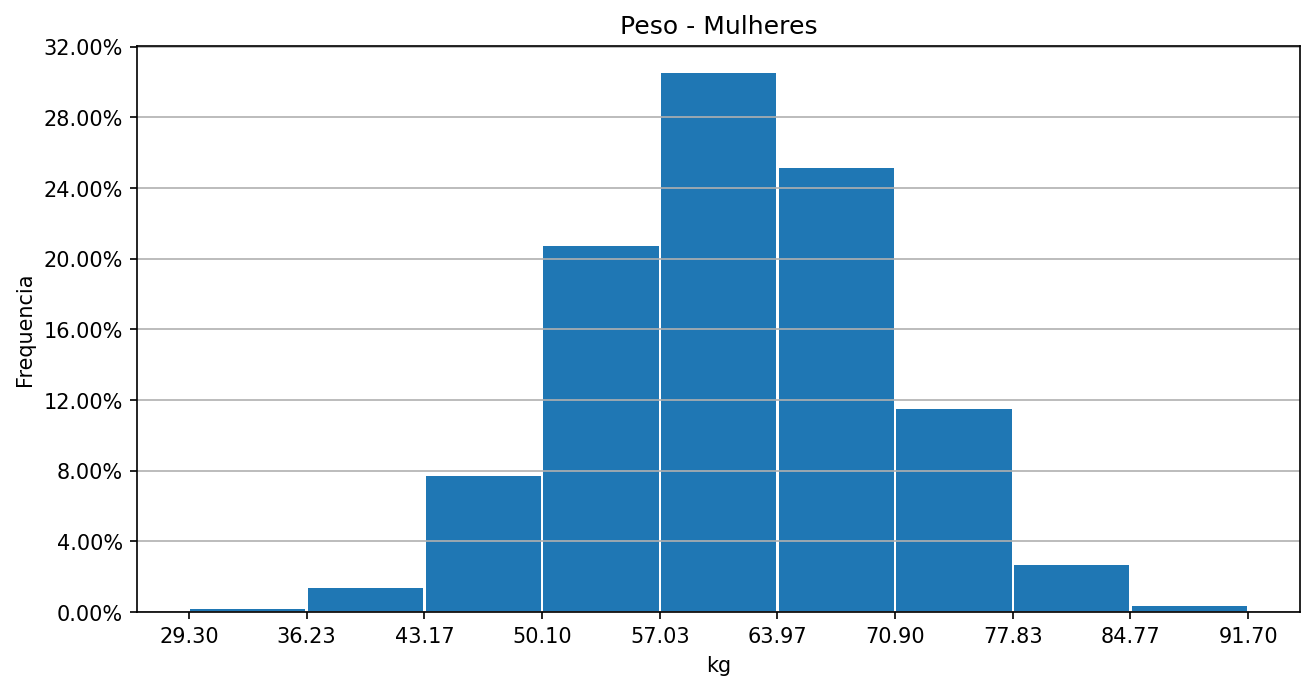

In [107]:
# histograma do peso das mulheres
gera_histograma(peso_mulheres, 9, "Peso - Mulheres", "kg")

C:\Users\Leonardo\AppData\Local\Temp/ipykernel_2712/4050399821.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel) # Substituindo as y_labels pela frequencia relativa


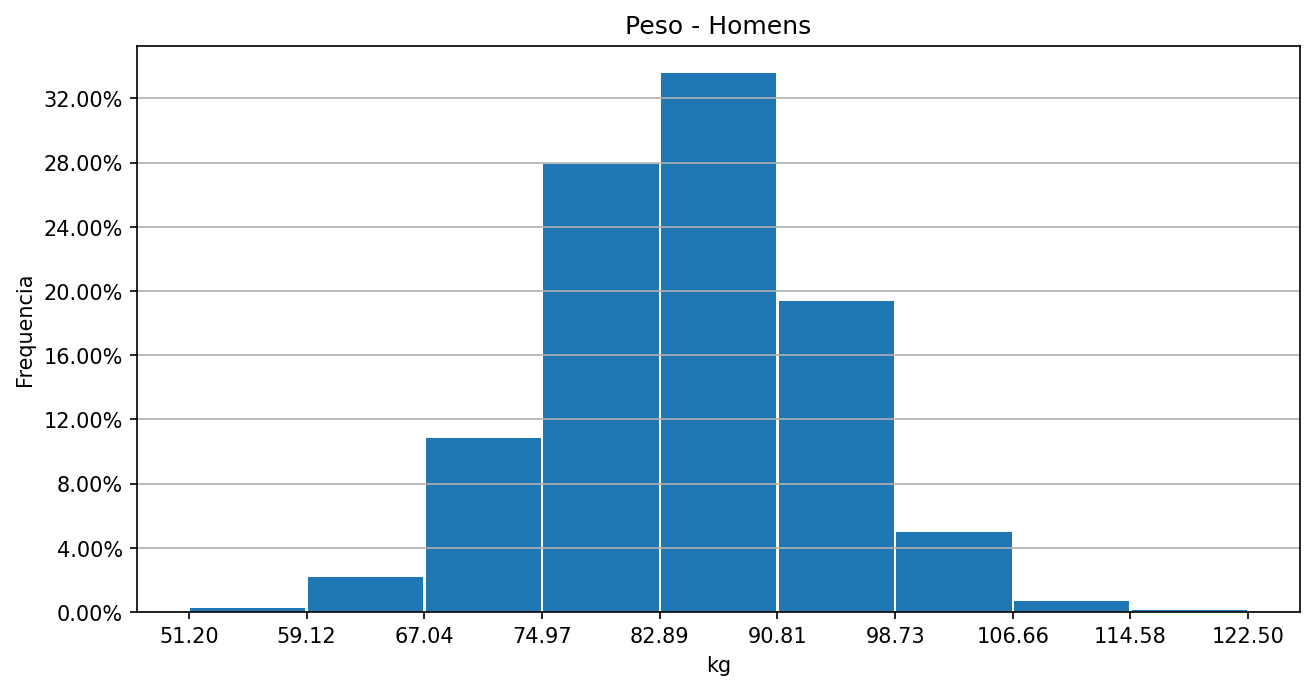

In [108]:
# histograma do peso das homens
gera_histograma(peso_homens, 9, "Peso - Homens", "kg")

In [109]:
# variancia, desvio padrão e coeficiente de variação Mulheres
# import statistics as stats
var_pesoMulheres = stats.variance(peso_mulheres) # variancia
desvPad_pesoMulheres = stats.stdev(peso_mulheres) # desvio padrão
cv_pesoMulheres = desvPad_pesoMulheres/stats.mean(peso_mulheres) # coeficiente 
                                                                # de variação

In [110]:
# variancia, desvio padrão e coeficiente de variação Homens
# import statistics as stats
var_pesoHomens = stats.variance(peso_homens) # variancia
desvPad_pesoHomens = stats.stdev(peso_homens) # desvio padrão
cv_pesoHomens = desvPad_pesoMulheres/stats.mean(peso_homens) # coeficiente 
                                                                # de variação

In [120]:
print("Homens:")
print(">> Variancia: {:.2f}".format(var_pesoHomens))
print(">> Desvio Padrão: {:.2f}".format(desvPad_pesoHomens))
print(">> Coeficiente de Variação:", pct(cv_pesoHomens))

print("\nMulheres:")
print(">> Variancia: {:.2f}".format(var_pesoMulheres))
print(">> Desvio Padrão: {:.2f}".format(desvPad_pesoMulheres))
print(">> Coeficiente de Variação:", pct(cv_pesoMulheres))

Homens:
>> Variancia: 80.50
>> Desvio Padrão: 8.97
>> Coeficiente de Variação: 10.17%

Mulheres:
>> Variancia: 74.46
>> Desvio Padrão: 8.63
>> Coeficiente de Variação: 14.00%


In [121]:
dados = {"Homens": {
          "CV_Altura":pct(cv_alturaHomens), 
          "CV_Peso": pct(cv_pesoHomens)
         },
         "Mulheres": {
             "CV_Altura":pct(cv_alturaMulheres),
             "CV_Peso": pct(cv_pesoMulheres)
         }}

In [122]:
dados 

{'Homens': {'CV_Altura': '4.16%', 'CV_Peso': '10.17%'},
 'Mulheres': {'CV_Altura': '4.23%', 'CV_Peso': '14.00%'}}

In [123]:
cv_data = pd.DataFrame.from_dict(dados)

In [124]:
cv_data.head()

,Homens,Mulheres
CV_Altura,4.16%,4.23%
CV_Peso,10.17%,14.00%


### Covariancia

In [142]:
def covariancia(X, Y):
    if len(X) != len(Y):
        return
    
    media_x = stats.mean(X)
    media_y = stats.mean(Y)
    
    somatorio = 0    
    for x,y in zip(X,Y):
        calc = (x - media_x)*(y - media_y)
        somatorio += calc
    
    covariancia = somatorio/(len(X)-1) # ou len(Y)
    return covariancia


def coef_correlacao(X, Y):
    # import statistcs as stats
    cov = covariancia(X, Y)
    
    desvPadrao_x = stats.stdev(X)
    desvPadrao_y = stats.stdev(Y)
    
    coef_correlacao = cov/(desvPadrao_x*desvPadrao_y)
    return coef_correlacao

In [126]:
data.head()

,Gender,Height,Weight,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [130]:
altura_mulheres = data.loc[data['Gender'] == 'Female']['Altura_cm'] 
peso_mulheres =  data.loc[data['Gender'] == 'Female']['Peso_kg'] 

altura_homens = data.loc[data['Gender'] == 'Male']['Altura_cm'] 
peso_homens = data.loc[data['Gender'] == 'Male']['Peso_kg']

In [140]:
covariancia(altura_mulheres, altura_homens)

-1.5629749949990066

In [141]:
covariancia(peso_mulheres, peso_homens)

-1.5149151590317995

In [153]:
pct(coef_correlacao(altura_homens, peso_homens))

'86.25%'

In [154]:
pct(coef_correlacao(altura_mulheres, peso_mulheres))

'84.90%'

In [149]:
# calculando correlação com o pandas
dataMulheres = data.loc[data['Gender'] == 'Female'][['Altura_cm', 'Peso_kg']]
dataMulheres.head()

,Altura_cm,Peso_kg
5000,150.0,46.3
5001,166.0,64.1
5002,161.0,59.4
5003,164.0,58.1
5004,157.0,58.9


In [150]:
dataMulheres.corr()

,Altura_cm,Peso_kg
Altura_cm,1.00000,0.84897
Peso_kg,0.84897,1.00000


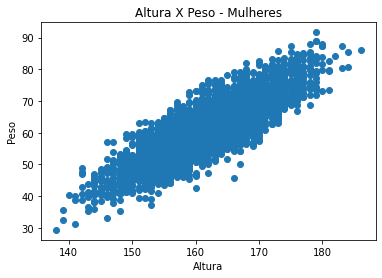

In [158]:
plt.scatter(dataMulheres["Altura_cm"], dataMulheres["Peso_kg"])

plt.title("Altura X Peso - Mulheres")
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()